# The Battle of Ramen
## This notebook contains the analysis of the global ramen noodles data
### Which can be found here : https://www.kaggle.com/residentmario/ramen-ratings

### Let's start off by importing all the necessary libraries

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

## Reading the csv as Pandas DataFrame and viewing the first 5 columns

### You can notice we have the following columns Review, Brand, Variety, Style, Stars and Top Ten

In [2]:
ramen_data=pd.read_csv(location_of_the_file)
ramen_data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


## Let's concern ourselves with only the noodles that reached top 10

In [7]:
top10=ramen_data.dropna(subset=['Top Ten'])

In [28]:
top10.Country.unique()

array(['Myanmar', 'Singapore', 'Taiwan', 'China', 'Malaysia', 'Japan',
       'Thailand', 'South Korea', 'USA', 'Indonesia', 'Hong Kong'],
      dtype=object)

## The following countries have made it to the top 10 
### Myanmar, Singapore, Taiwan, China, Malaysia, Japan, Thailand, South Korea, USA, Indonesia, Hong Kong

#### So let's go ahead and make another DataFrame with the data of only the countries in the top 10

In [52]:
top_10_country_df={}
for name in top10.Country.unique():
    top_10_country_df[name]=(top10["Country"][top10["Country"]==name].count())

In [53]:
top_10_country_df=pd.DataFrame(top_10_country_df,index=[0])
top_10_country_df=top_10_country_df.transpose()
top_10_country_df.rename(columns={0:"Count"},inplace=True)

## The DataFrame below shows the frequency of how many times each country  was in the top 10 ramen noodles category

In [455]:
top_10_country_df.head()

,Count,Countries
Myanmar,1,Myanmar
Singapore,7,Singapore
Taiwan,2,Taiwan
China,1,China
Malaysia,6,Malaysia


In [57]:
top_10_country_df['Countries']=top_10_country_df.index

# It's time to give this data some visual appearance

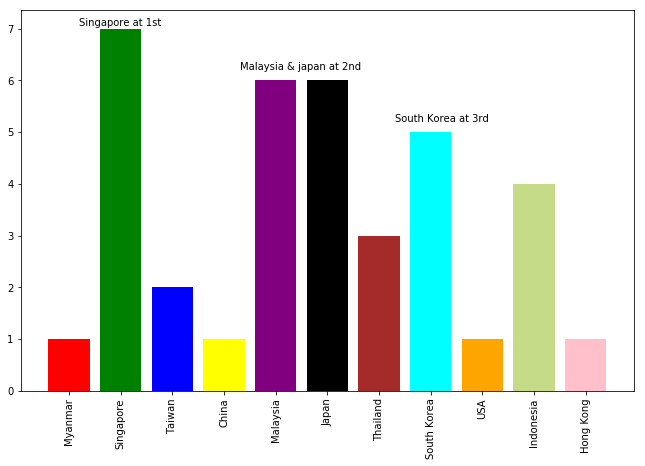

In [274]:
plt.bar(top_10_country_df['Countries'],top_10_country_df['Count'],color=['red','green','blue','yellow','purple','black','brown','cyan','orange','#c6db88','pink'])
fig=plt.gcf()
fig.set_size_inches(11,7)
plt.xticks(rotation='vertical')
plt.annotate("Singapore at 1st",xy=(0.2,7.05))
plt.annotate("Malaysia & japan at 2nd",xy=(3.3,6.2))
plt.annotate("South Korea at 3rd",xy=(6.3,5.2))
plt.title=("Countries with top 10 rated ramen")
plt.show()


# From the bar graph we can see that...
## Singapore made it to the top 10 list 7 times
## Followed by Japan and Malaysia with 6 times
## and Finally by South Korea with 5 times

### Myanmar , China , USA and Hong Kong made it to the top 10 just once

# Let's find out the production of ramen in all of the countries mentioned in our data

In [111]:
#lets find out the ratio of the countries making ramen noodles
total = ramen_data.Country.count()

## let's create a separate DataFrame of all countries with the percentage of their share of production

In [182]:
country_df={}
for name in ramen_data.Country.unique():
    country_df[name]=(ramen_data['Country'][ramen_data["Country"]==name].count()*100/total)
    
country_df=pd.DataFrame(country_df,index=[0]).transpose()
country_df.rename(columns={0:"Percentage"},inplace=True)
country_df['Country']=country_df.index

In [321]:
#sorting the dataframe
country_df=country_df.sort_values(['Percentage'],ascending=False)

In [456]:
country_df.head()

,Percentage,Country
Japan,13.643411,Japan
USA,12.519380,USA
South Korea,11.976744,South Korea
Taiwan,8.682171,Taiwan
Thailand,7.403101,Thailand


# Here we are, visualising this data again!
Oh what would I do without you matplotlib

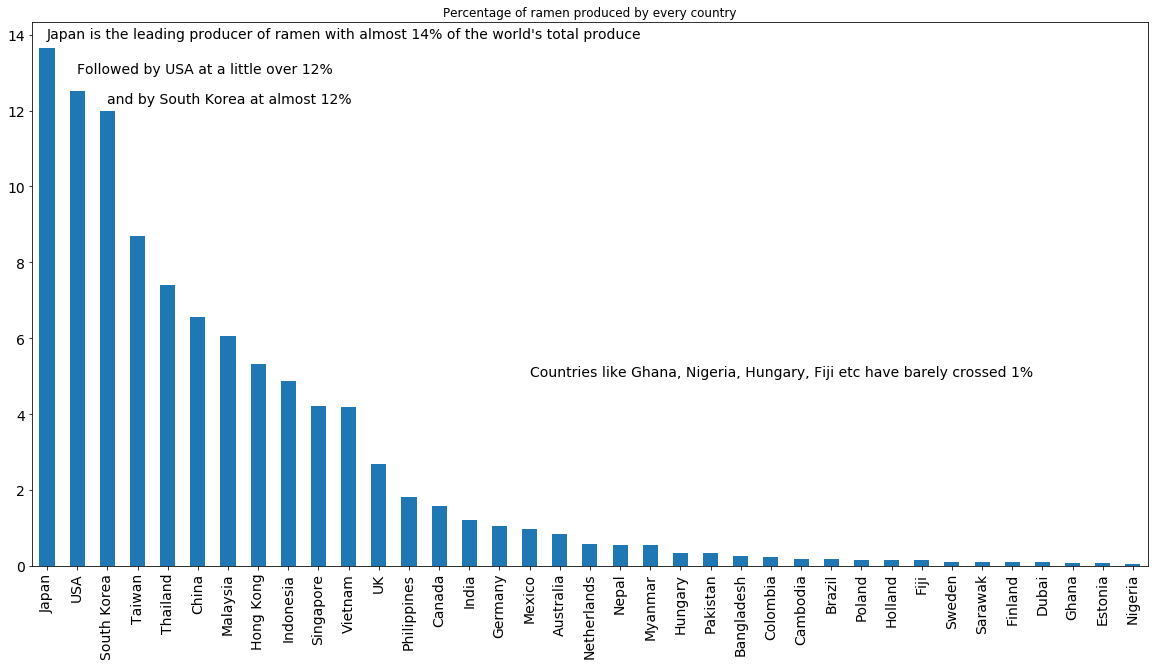

In [323]:
ax=country_df.plot(kind='bar',figsize=(20,10),fontsize=14,legend=None,title="Percentage of ramen produced by every country")
ax.annotate("Japan is the leading producer of ramen with almost 14% of the world's total produce",xy=(0,13.9),fontsize=14)
ax.annotate("Followed by USA at a little over 12%",xy=(1,13),fontsize=14)
ax.annotate("and by South Korea at almost 12% ",xy=(2,12.2),fontsize=14)
ax.annotate("Countries like Ghana, Nigeria, Hungary, Fiji etc have barely crossed 1%",xy=(16,5),fontsize=14)
ax.set_ylabel=("Percentage of ramen production")
ax.set_xlabel=("Country names")
plt.show()

# The results are very clear... Japan , USA and South Korea are the top 3 countries with the highest production of ramen noodles!

### Something tells me that ramen is the favourite snack all over the world

# Let's move on and find out which of the top 3 ramen producing countries have the highest average rating of their ramen noodles

## For this of course we are going to create another DataFrame with the following columns
## 1) Country
## 2) Stars

In [362]:
#lets find the average star ratings of each the top 3 ramen producing countries
top_3_producing=ramen_data[['Country','Stars']][(ramen_data['Country']=="Japan") | (ramen_data['Country']=="USA")| (ramen_data['Country']=="South Korea")]

In [363]:
top_3_producing.replace('Unrated',np.nan,inplace=True)
top_3_producing.dropna(inplace=True)

In [367]:
#lets convert the data type of every element in the series stars to float64
top_3_producing=top_3_producing.astype({'Stars':'float64'})
top_3_producing.dtypes

Country     object
Stars      float64
dtype: object

# And it looks something like this:

In [457]:
top_3_producing.head()

,Country,Stars
0,Japan,3.75
2,USA,2.25
5,South Korea,4.75
6,Japan,4.00
7,Japan,3.75


# We will now take the average of the star rating of every country for comparison and store it in....
## If you said another DataFrame you are absolutely right!

In [415]:
average_star_ratings={"Japan":statistics.mean(top_3_producing['Stars'][top_3_producing['Country']=="Japan"]),"USA":statistics.mean(top_3_producing['Stars'][top_3_producing['Country']=="USA"]),"South Korea":statistics.mean(top_3_producing['Stars'][top_3_producing['Country']=="South Korea"])}

In [416]:
average_star_ratings=pd.DataFrame(average_star_ratings,index=['Average']).transpose()
average_star_ratings['Countries']=average_star_ratings.index
average_star_ratings

,Average,Countries
Japan,3.981605,Japan
USA,3.457043,USA
South Korea,3.790554,South Korea


In [418]:
average_star_ratings.sort_index(inplace=True)

# So we have our DataFrame, We have seen what it looks like.....which leaves only one more thing to do.
## VISUALISE

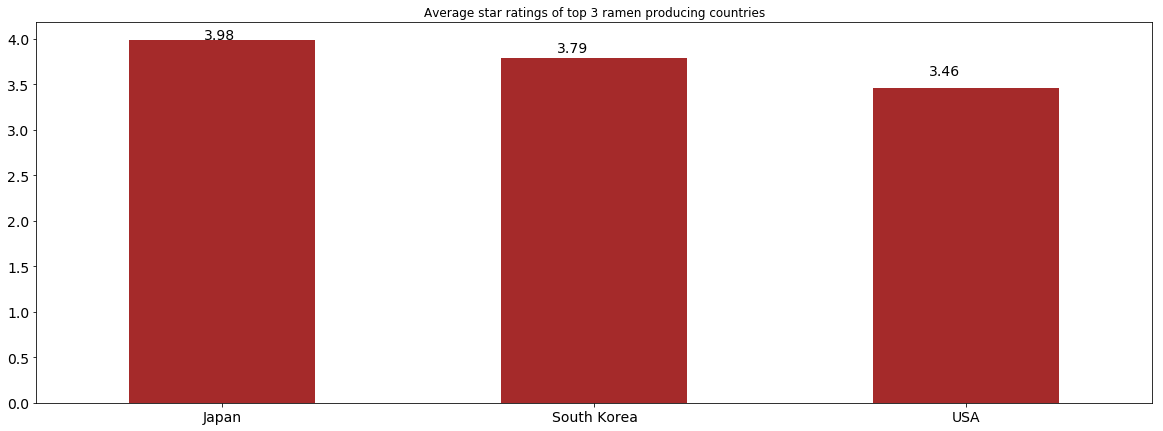

In [507]:
ax=average_star_ratings.plot(kind="bar",title="Average star ratings of top 3 ramen producing countries",legend=None,figsize=(20,7),fontsize=14,color='brown')
ax.set_xlabel=('Countries')
ax.set_ylabel=('Rating')
ax.annotate(round(average_star_ratings.iloc[0,0],2),xy=(-0.05,4),fontsize=14)
ax.annotate(round(average_star_ratings.iloc[1,0],2),xy=(0.9,3.85),fontsize=14)
ax.annotate(round(average_star_ratings.iloc[2,0],2),xy=(1.9,3.6),fontsize=14)
plt.xticks(rotation=0,fontsize=14)
plt.show()

# It's clear from the graph above Japan has the highest quality noodles
Ramen lovers take notes!
# Though the difference in rating among the three countries is minimal 
# Since Japan has taken the number 1 spot  let's explore and see what brand is most popular among the Japanese

## For this, we are going to be taking the average star rating of every single brand in Japan that produces ramen noodles

### So let's beging retrieving our required data

In [458]:
jp_data=ramen_data[['Brand','Stars']][ramen_data['Country']=="Japan"]
jp_data.head(7)

,Brand,Stars
0,New Touch,3.75
6,Acecook,4
7,Ikeda Shoku,3.75
8,Ripe'n'Dry,0.25
13,Nissin,4.5
27,Nissin,4.75
34,New Touch,3.75


In [459]:
#Let's have a look at the brands of ramen noodles in Japan
jp_data['Brand'].unique()

array(['New Touch', 'Acecook', 'Ikeda Shoku', "Ripe'n'Dry", 'Nissin',
       'Fujiwara', 'Maruchan', 'Sokensha', 'Takamori', 'Samurai Ramen',
       'Ogasawara', 'Tokyo Noodle', 'MyKuali', 'Ajinatori', 'Myojo',
       'Daikoku', 'Marutai', 'Sapporo Ichiban', 'Tablemark', 'Nagatanien',
       'Menraku', 'Itomen', 'Sanpo', 'Tokushima Seifun', 'Itsuki',
       'Higashimaru', 'Kuriki', 'Daraz', 'Seven & I', 'Sugakiya Foods',
       'Nakaya Shouten', 'Torishi', 'Ishimaru', 'Yamadai',
       'Sakurai Foods', 'Samyang Foods', 'Mitoku', 'Unzen', 'Oyatsu',
       'Men-Sunaoshi', 'Takamori Kosan', 'Kimura', 'Tokachimen Koubou',
       'Kumamoto', 'Sanrio', 'Peyang', 'Nagao Noodle', 'Goku Uma',
       'Fuji Mengyo', 'Seven-Eleven', 'Paldo', 'Yamamoto', 'JFC',
       'Yamamori', 'Shirakiku', 'Sanyo Foods', 'Higashi', 'Sakurai'],
      dtype=object)

### Now that's a lot of brands
###### Flex tape reference

## Let's go ahead and gather out the average ratings for each of these brands

In [466]:
jp_brands={}
jp_data=jp_data.astype({"Stars":"float64"})
for x in jp_data['Brand'].unique():
    jp_brands[x]=statistics.mean(jp_data['Stars'][jp_data['Brand']==x])
jp_brands=pd.DataFrame(jp_brands,index=['Average']).transpose()
jp_brands['Brands']=jp_brands.index
jp_brands.head()

,Average,Brands
New Touch,4.277778,New Touch
Acecook,3.217857,Acecook
Ikeda Shoku,4.125000,Ikeda Shoku
Ripe'n'Dry,2.083333,Ripe'n'Dry
Nissin,4.259910,Nissin


### To keep the comparison fair I have decided to drop all the brands that had and average rating of 5 stars which are:
#### 1) Takamori
#### 2) MyKuali
#### 3) Seven & I
#### 4) Torishi
#### 5) Kimura
#### 6) Peyang
#### 7) Higashi

### Since they had less than 3 ratings
gone but not forgotten

In [493]:
jp_brands.drop('''this is where they were all written down to perform the dropping''',inplace=True,axis=0)

## Let's sort out the data for a so we can plot a cleaner looking graph

In [495]:
jp_brands.sort_values('Average',ascending=False,inplace=True)

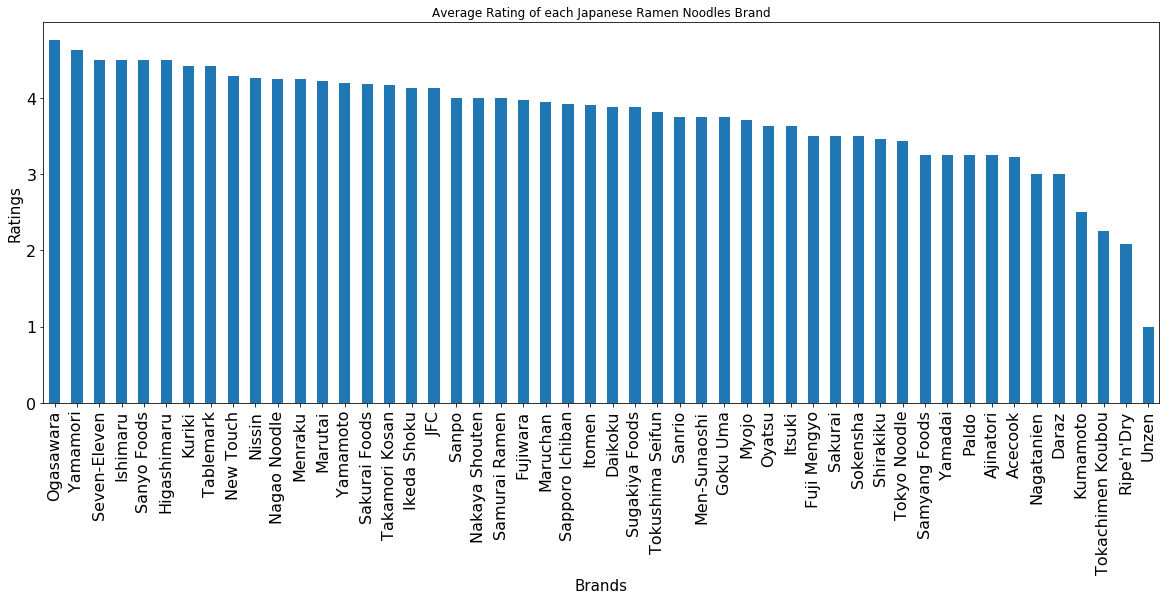

In [509]:
ax=jp_brands.plot(kind='bar',fontsize=16,legend=None,figsize=(20,7),title="Average Rating of each Japanese Ramen Noodles Brand")
ax.set_ylabel("Ratings",fontsize=15)
ax.set_xlabel("Brands",fontsize=15)
plt.show()

# To conclude this analysis we can definitely say this with authority that Japan knows how to make some high quality noodles